In [2]:
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.stats import kurtosis, skew
import os
from rcv_distribution import *

In [2]:
def analyze_peaks(data):
    # Find peaks
    peaks, _ = find_peaks(data)
    peak_heights = data[peaks]

    # Check if there are at least two peaks
    if len(peak_heights) < 2:
        raise ValueError("Not enough peaks to determine bimodality")

    # Sort peaks by height
    sorted_indices = np.argsort(peak_heights)[::-1]  # Descending order
    top_peaks = sorted_indices[:2]  # Get the indices of the two highest peaks

    peak1, peak2 = peaks[top_peaks[0]], peaks[top_peaks[1]]
    height1, height2 = peak_heights[top_peaks[0]], peak_heights[top_peaks[1]]
    
    # Calculate significance (difference from the mean of other peaks)
    other_heights = np.delete(peak_heights, top_peaks)
    mean_other_heights = np.mean(other_heights)
    std_other_heights = np.std(other_heights)
    
    significance1 = (height1 - mean_other_heights) / std_other_heights
    significance2 = (height2 - mean_other_heights) / std_other_heights
    
    # Calculate closeness (absolute difference in heights)
    closeness = abs(height1 - height2)
    
    # Calculate distance on the x-axis
    distance_on_x_axis = abs(peak1 - peak2)
    
    return {
        "significance_of_peak1": significance1,
        "significance_of_peak2": significance2,
        "closeness_of_peaks": closeness,
        "distance_on_x_axis": distance_on_x_axis
    }

In [3]:
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [4]:
def analyze_kde_peaks(data, bandwidth=0.1):
    
    data = normalize_data(data)
    
    # Calculate KDE
    kde = gaussian_kde(data, bw_method=bandwidth)
    x = np.linspace(np.min(data), np.max(data), 1000)
    kde_values = kde(x)

    # Find peaks in the KDE
    peaks, _ = find_peaks(kde_values)
    peak_heights = kde_values[peaks]

    # Check if there are at least two peaks
    if len(peak_heights) < 2:
        raise ValueError("Not enough peaks to determine bimodality")

    # Sort peaks by height
    sorted_indices = np.argsort(peak_heights)[::-1]  # Descending order
    top_peaks = sorted_indices[:2]  # Get the indices of the two highest peaks

    peak1, peak2 = peaks[top_peaks[0]], peaks[top_peaks[1]]
    height1, height2 = peak_heights[top_peaks[0]], peak_heights[top_peaks[1]]
    
    # Calculate significance (difference from the mean of other peaks)
    other_heights = np.delete(peak_heights, top_peaks)
    mean_other_heights = np.mean(other_heights)
    std_other_heights = np.std(other_heights)
    
    significance1 = (height1 - mean_other_heights) / std_other_heights
    significance2 = (height2 - mean_other_heights) / std_other_heights
    
    # Calculate closeness (absolute difference in heights)
    closeness = abs(height1 - height2)
    
    # Calculate distance on the x-axis
    distance_on_x_axis = abs(x[peak1] - x[peak2])

    bimodality = (significance1 * significance2) / (closeness * (abs(significance1 - significance2)))
    
    return {
        "peak1": peak1,
        "peak2": peak2,
        "significance_of_peak1": significance1,
        "significance_of_peak2": significance2,
        "closeness_of_peaks": closeness,
        "distance_on_x_axis": distance_on_x_axis,
        "Bimodality" : bimodality
    }


Significance of peak 1: 0.9887866689297592
Significance of peak 2: 0.9887866689297592
Closeness of peaks: 0.0
Distance on x axis: 140057


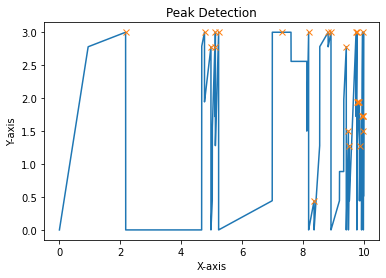

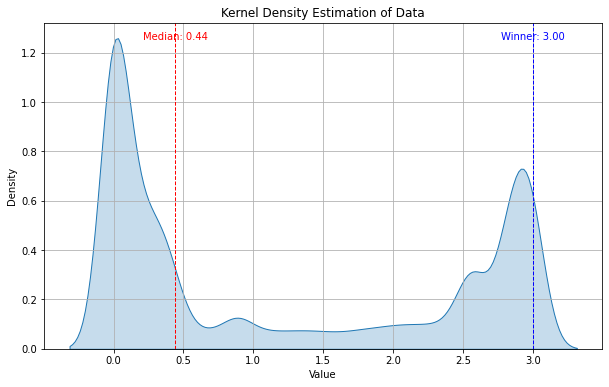

In [3]:
# Example usage 
filename = "Alaska_11082022_GovernorLieutenantGovernor"
data = np.load("np_data/" + filename + ".npy")

result = analyze_peaks(data)
print("Significance of peak 1:", result["significance_of_peak1"])
print("Significance of peak 2:", result["significance_of_peak2"])
print("Closeness of peaks:", result["closeness_of_peaks"])
print("Distance on x axis:", result["distance_on_x_axis"])

# Plotting
x = np.linspace(0, 10, len(data))
peaks, _ = find_peaks(data)
plt.plot(x, data)
plt.plot(x[peaks], data[peaks], "x")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Peak Detection')
plt.show()

plot_median_and_winner(filename)

peak1:  692   peak2:  562
Significance of peak 1: 2.1802787232802774
Significance of peak 2: 2.133827370513045
Closeness of peaks: 0.024049785107006727
Distance on x axis: 0.1301301301301302
Bimodality 4164.489120575616


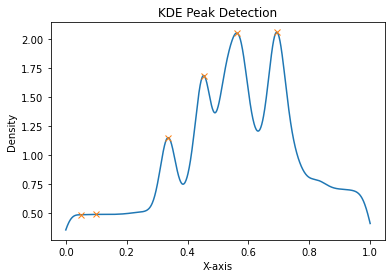

In [7]:
filename = "Minneapolis_11072017_Mayor"
data = np.load("np_data/" + filename + ".npy")

result = analyze_kde_peaks(data)
print("peak1: ", result["peak1"], " ", "peak2: ", result["peak2"])
print("Significance of peak 1:", result["significance_of_peak1"])
print("Significance of peak 2:", result["significance_of_peak2"])
print("Closeness of peaks:", result["closeness_of_peaks"])
print("Distance on x axis:", result["distance_on_x_axis"])
print("Bimodality", result["Bimodality"])

# Plotting
data = normalize_data(data)
kde = gaussian_kde(data)
x = np.linspace(np.min(data), np.max(data), 1000)
kde_values = kde(x)
peaks, _ = find_peaks(kde_values)

plt.plot(x, kde_values)
plt.plot(x[peaks], kde_values[peaks], "x")
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.title('KDE Peak Detection')
plt.show()





In [4]:
def analyze_kde_peaks_normalized_heights(data, bandwidth=0.1):
    # Normalize the data
    data = normalize_data(data)

    # Calculate KDE
    kde = gaussian_kde(data, bw_method=bandwidth)
    x = np.linspace(np.min(data), np.max(data), 1000)
    kde_values = kde(x)

    # Normalize KDE values
    kde_values = normalize_data(kde_values)

    # Find peaks in the KDE
    peaks, _ = find_peaks(kde_values)
    peak_heights = kde_values[peaks]

    # Check if there are at least two peaks
    if len(peak_heights) < 2:
        raise ValueError("Not enough peaks to determine bimodality")

    # Sort peaks by height
    sorted_indices = np.argsort(peak_heights)[::-1]  # Descending order
 
    top_peaks = sorted_indices[:2]  # Get the indices of the two highest peaks

    peak1, peak2 = peaks[top_peaks[0]], peaks[top_peaks[1]]
    height1, height2 = peak_heights[top_peaks[0]], peak_heights[top_peaks[1]]
    
    # Calculate significance (difference from the mean of other peaks)
    other_heights = np.delete(peak_heights, top_peaks)
    mean_other_heights = np.mean(other_heights)
    std_other_heights = np.std(other_heights)
    
    significance1 = (height1 - mean_other_heights) / std_other_heights
    significance2 = (height2 - mean_other_heights) / std_other_heights
    
    # Calculate closeness (absolute difference in heights)
    closeness = abs(height1 - height2)
    
    # Calculate distance on the x-axis
    distance_on_x_axis = abs(x[peak1] - x[peak2])


    x_between_peaks = x[min(peak1, peak2):max(peak1, peak2)+1]
    kde_values_between_peaks = kde_values[min(peak1, peak2):max(peak1, peak2)+1]
    area_between_peaks = simps(kde_values_between_peaks, x_between_peaks)
    
    bimodality = (significance1 * significance2) / ((1 + closeness) * (1 + (abs(significance1 - significance2))))
    
    return {
        "peak1": x[peak1],
        "peak2": x[peak2],
        "significance_of_peak1": significance1,
        "significance_of_peak2": significance2,
        "closeness_of_peaks": closeness,
        "distance_on_x_axis": distance_on_x_axis,
        "Bimodality" : bimodality
    }

[0.21637563 1.         0.01746914 0.22875814 0.7238477  0.2592004 ]
peak1:  0.3153153153153153  peak2:  0.7857857857857857
Significance of peak 1: 8.59254192417784
Significance of peak 2: 5.697230368141276
Closeness of peaks: 0.2761522975515439
Distance on x axis: 0.4704704704704704
Bimodality 9.847834341774394


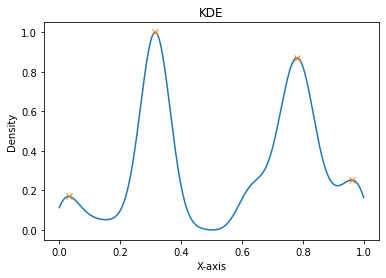

Skewness:  -0.10759931974955617
Kurtosis:  1.7674054836569637
Bimodality II:  0.5723517455188029
Bimodality III:  0.21214247834889524


In [10]:
filename = "Minnetonka_11022021_CityCouncilAtLargeSeatB"
data = np.load("np_data/" + filename + ".npy")

result = analyze_kde_peaks_normalized_heights(data)
print("peak1: ", result["peak1"], " peak2: ", result["peak2"])

print("Significance of peak 1:", result["significance_of_peak1"])
print("Significance of peak 2:", result["significance_of_peak2"])
print("Closeness of peaks:", result["closeness_of_peaks"])
print("Distance on x axis:", result["distance_on_x_axis"])
print("Bimodality", result["Bimodality"])

# Plotting
data = normalize_data(data)
kde = gaussian_kde(data)
x = np.linspace(np.min(data), np.max(data), 1000)
kde_values = kde(x)
kde_values = normalize_data(kde_values)
peaks, _ = find_peaks(kde_values)

plt.plot(x, kde_values)
plt.plot(x[peaks], kde_values[peaks], "x")
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.title('KDE')
plt.show()

s = skew(data)
k = kurtosis(data, fisher=False)
print("Skewness: ", s)
print("Kurtosis: ", k)
print("Bimodality II: ", ((s ** 2) + 1)/k)

n = len(data)
bimodality3 = (s**2 + 1) / (k + 3 * (n-1)**2 / ((n-2) * (n-3)))

print("Bimodality III: ", bimodality3)


c:\Users\mahsh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

table = pd.read_csv("median_voter_analysis2.csv")
directory = "np_data_new"

for filename in os.listdir(directory):
    try:
        data = np.load("np_data_new/" + filename)
        result = analyze_kde_peaks_normalized_heights(data)
        polarization = result["distance_on_x_axis"]
        filename = filename[0:-4] + ".csv"
        print(filename)
        table.loc[table["filename"]==filename, "polarization"] = polarization
        
    except Exception as e:
        filename = filename[0:-4] + ".csv"
        print(filename, " " , e)
        table.loc[table["filename"]==filename, "polarization"] = "NA"
    print(table.loc[table["filename"]==filename, "polarization"].tolist())



Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv
[0.24324324324324326]
Alaska_08162022_HouseofRepresentativesSpecial.csv
[0.977977977977978]
Alaska_11082022_GovernorLieutenantGovernor.csv
[0.9529529529529529]
Alaska_11082022_HouseDistrict1.csv
[0.9969969969969971]
Alaska_11082022_HouseDistrict10.csv
[0.990990990990991]
Alaska_11082022_HouseDistrict11.csv
[0.6236236236236237]
Alaska_11082022_HouseDistrict12.csv
[0.9969969969969971]
Alaska_11082022_HouseDistrict13.csv
[0.9969969969969971]
Alaska_11082022_HouseDistrict14.csv
[0.997997997997998]
Alaska_11082022_HouseDistrict15.csv
[0.981981981981982]
Alaska_11082022_HouseDistrict16.csv
[0.997997997997998]
Alaska_11082022_HouseDistrict17.csv
[0.9929929929929929]
Alaska_11082022_HouseDistrict18.csv
[0.6306306306306306]
Alaska_11082022_HouseDistrict19.csv
[0.9939939939939939]
Alaska_11082022_HouseDistrict2.csv
[0.997997997997998]
Alaska_11082022_HouseDistrict20.csv
[0.975975975975976]
Alaska_11082022_HouseDistrict21.csv
[0.997997997997998]
Alas

In [16]:
table.to_csv("median_voter_analysis.csv")

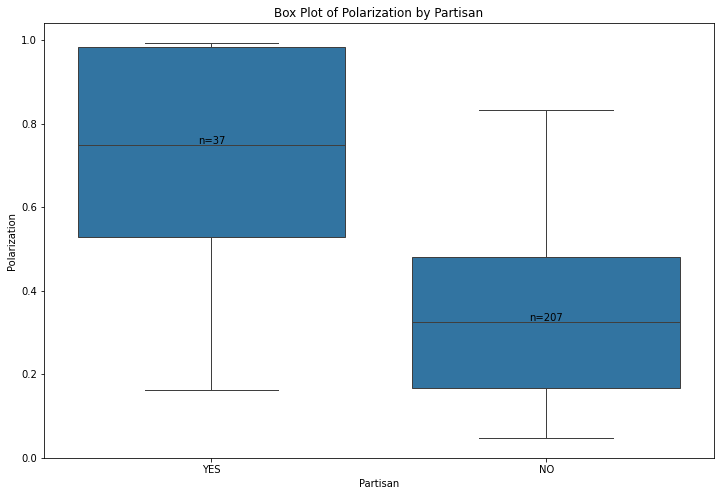

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['gamma', 'partisan', 'polarization'])
df = df[df['gamma'] < 1]

# Filter data for partisan == YES and NO
df_yes = df[df['partisan'] == 'YES']
df_no = df[df['partisan'] == 'NO']

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plotting with seaborn without outliers
sns.boxplot(x='partisan', y='polarization', data=pd.concat([df_yes, df_no]), showfliers=False)

# Annotate with number of values at each point
# Calculate counts
counts_yes = df_yes.groupby('partisan').size().values[0]
counts_no = df_no.groupby('partisan').size().values[0]

# Annotate the plot with counts
plt.text(0, df_yes['polarization'].median(), f'n={counts_yes}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
plt.text(1, df_no['polarization'].median(), f'n={counts_no}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

# Customize plot
plt.title('Box Plot of Polarization by Partisan')
plt.xlabel('Partisan')
plt.ylabel('Polarization')

# Show plot
plt.show()
